In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os

from xgboost import XGBClassifier




In [2]:
df=pd.read_csv('train.csv')
x_test=pd.read_csv('test.csv')

In [3]:

    
def normalize_name(x):
    return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

def ticket_number(x):
    return x.split(" ")[-1]
    


df["Name"] = df["Name"].apply(normalize_name)
df["Ticket_number"] = df["Ticket"].apply(ticket_number)
                   


In [23]:
def ticket_item(x):
    items = x.split(" ")
    if len(items) == 1:
        return "NONE"
    return items[0:-1][0]
df["Ticket_item"] = df["Ticket"].apply(ticket_item)  

In [24]:

print(df["Ticket_item"])

0           A/5
1            PC
2      STON/O2.
3          NONE
4          NONE
         ...   
886        NONE
887        NONE
888       W./C.
889        NONE
890        NONE
Name: Ticket_item, Length: 891, dtype: object


In [ ]:
def tokenize_names(features, labels=None):
    """Divite the names into tokens. TF-DF can consume text tokens natively."""
    features["Name"] =  tf.strings.split(features["Name"])
    return features, labels

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_train_df,label="Survived").map(tokenize_names)
serving_ds = tfdf.keras.pd_dataframe_to_tf_dataset(preprocessed_serving_df).map(tokenize_names)

In [3]:


ids=x_test['PassengerId']

df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test=x_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())
x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean())

df = pd.get_dummies(df, columns=['Sex','Embarked'], prefix=['Sex','Embarked'],dtype=int)
x_test = pd.get_dummies(x_test, columns=['Sex','Embarked'], prefix=['Sex','Embarked'],dtype=int)


y_train=df['Survived']
df=df.drop(['Survived'],axis=1)

In [5]:
df.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
x_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [4]:
#split the data
x_train, x_cv, y_train, y_cv = train_test_split(df, y_train,test_size=0.20,random_state=32)

In [6]:


#scaling the data using standard scaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train[['Age','SibSp','Parch','Fare']])
x_test=scaler.transform(x_test[['Age','SibSp','Parch','Fare']])
x_cv=scaler.transform(x_cv[['Age','SibSp','Parch','Fare']])




In [7]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
pretrain=model.predict(x_cv)

In [9]:
pretrain=model.predict(x_cv)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pretrain,y_cv)
print(acc)

0.6256983240223464


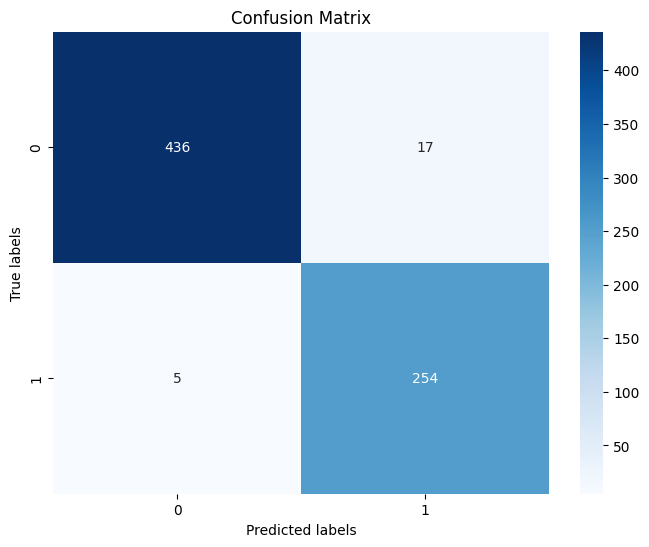

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(pretrain,y_train)

# Display confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [51]:
# Initialize the XGBClassifier with parameters
model2 = XGBClassifier(
    reg_lambda=2,
)

# Fit the model to the training data
model2.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_cv, y_cv)], verbose=False)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
pretrain=model2.predict(x_train)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pretrain,y_train)
print(acc)

0.898876404494382


In [53]:
pretrain=model2.predict(x_cv)

from sklearn.metrics import accuracy_score
acc=accuracy_score(pretrain,y_cv)
print(acc)

0.8491620111731844


In [42]:
y_pred=model2.predict(x_test)

ids=list(ids)
submit=pd.DataFrame({'PassengerId':ids,'Survived':y_pred})

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize the XGBClassifier with parameters
model = XGBClassifier(
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    learning_rate=0.01,
    n_estimators=1000
)

# Define the number of folds for cross-validation
k_folds = 5

# Define the cross-validation method
kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, df, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(scores)
print("Mean accuracy:", mean_accuracy)


Cross-validation scores: [0.84916201 0.86516854 0.80337079 0.83146067 0.84831461]
Mean accuracy: 0.8394953235829515


In [13]:
print(submit)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [43]:
submit.to_csv('submit_xg3.csv',index=False)

In [18]:
s=pd.read_csv('submit.csv')

In [19]:
s

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
